In [1]:
import numpy as np
import pandas as pd

In [2]:
leads=pd.read_csv("C:/Datasets/Leads.csv")

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Cleaning

In [4]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [5]:
leads.shape

(9240, 37)

In [6]:
for col in leads.columns:
    if leads[col].isnull().sum()>3000:
        leads.drop(col,axis=1,inplace=True)

In [7]:
leads.shape

(9240, 31)

In [8]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
leads.drop(["City"],axis=1,inplace=True)

In [10]:
leads.drop(["Country"],axis=1,inplace=True)

In [11]:
leads.shape

(9240, 29)

In [12]:
round(leads.isna().sum()/leads.shape[0]*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [13]:
leads["Newspaper"].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [14]:
for column in leads:
    print(leads[column].astype("category").value_counts())
    print("....................")

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
....................
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
....................
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
....................
Google               2868
Direct Traffic       2543
Olark C

In [15]:
leads["Lead Profile"].astype("category").value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [16]:
leads["How did you hear about X Education"].astype("category").value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [17]:
leads.drop(["Lead Profile","How did you hear about X Education"],axis=1,inplace=True)

In [18]:
leads.shape

(9240, 27)

In [19]:
leads.drop(["Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1,inplace=True)

In [20]:
leads.shape

(9240, 15)

In [21]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [22]:
leads.drop(["What matters most to you in choosing a course"],axis=1,inplace=True)

In [23]:
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [24]:
leads=leads[~pd.isnull(leads["What is your current occupation"])] #drop only null value

In [25]:
leads.isna().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [26]:
leads=leads[~pd.isnull(leads["TotalVisits"])]

In [27]:
leads.isna().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [28]:
leads=leads[~pd.isnull(leads["Lead Source"])]

In [29]:
leads.isna().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [30]:
leads=leads[~pd.isnull(leads["Specialization"])]

In [31]:
leads.isna().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [32]:
leads.shape

(6373, 14)

In [33]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [34]:
leads.shape[0]/9240

0.6897186147186147

In [35]:
leads.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)

In [36]:
leads

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Unemployed,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,No,1,5.0,210,2.50,SMS Sent,Business Administration,Unemployed,No,Modified
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Yes,SMS Sent


In [37]:
leads.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [38]:
temp=leads.select_dtypes(include=object) #

In [39]:
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
dummy=pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)

In [41]:
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9235,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
leads=pd.concat([leads,dummy],axis=1)

In [43]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [44]:
leads=leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1)

In [45]:
leads

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,5.0,210,2.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9235,1,8.0,1845,2.67,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
(leads.dtypes=="object").sum() #no string column

0

In [47]:
X=leads.drop(["Converted"],axis=1)

In [48]:
X.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olar

In [49]:
y=leads["Converted"]

In [50]:
leads["Converted"].value_counts()

0    3308
1    3065
Name: Converted, dtype: int64

# Model Building

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100,stratify=y)

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler= MinMaxScaler()

In [55]:
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

<ipython-input-55-7a1695a3d601>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [56]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9192,0.163636,0.126320,0.054545,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3516,0.090909,0.046655,0.045455,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1888,0.109091,0.135123,0.109091,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
90,0.054545,0.094190,0.054545,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1327,0.036364,0.031250,0.036364,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [57]:
leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.010199,0.013015,0.046969,-0.239572,-0.039205,-0.032219,0.284301,0.050436,-0.026673,-0.012059
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.026851,0.005896,0.026100,-0.088690,-0.004994,0.226728,-0.028923,0.002792,0.001631,0.010859
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.020082,0.005003,0.024632,-0.107230,-0.009837,0.035147,0.082950,0.010331,0.001504,-0.009888
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.048724,0.003003,0.015492,-0.075318,-0.042338,0.017507,0.031327,0.015233,0.028551,0.001096
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.039927,0.010907,-0.002770,-0.062914,-0.085315,0.050847,0.020810,-0.013579,0.024441,-0.014388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Page Visited on Website,-0.032219,0.226728,0.035147,0.017507,0.050847,-0.016433,-0.012129,0.056343,-0.012353,-0.013925,...,-0.127499,-0.002329,-0.008407,-0.123332,-0.020429,1.000000,-0.119786,-0.010944,-0.013001,-0.002329
Last Notable Activity_SMS Sent,0.284301,-0.028923,0.082950,0.031327,0.020810,0.091734,-0.036712,0.002049,-0.032370,-0.024070,...,-0.441685,-0.008070,-0.029124,-0.427251,-0.070769,-0.119786,1.000000,-0.037914,-0.045037,-0.008070
Last Notable Activity_Unreachable,0.050436,0.002792,0.010331,0.015233,-0.013579,0.009242,-0.003839,-0.020353,-0.003910,0.016786,...,-0.040355,-0.000737,-0.002661,-0.039036,-0.006466,-0.010944,-0.037914,1.000000,-0.004115,-0.000737
Last Notable Activity_Unsubscribed,-0.026673,0.001631,0.001504,0.028551,0.024441,-0.022143,-0.004560,0.004402,-0.004644,-0.004646,...,-0.047937,-0.000876,-0.003161,-0.046371,-0.007681,-0.013001,-0.045037,-0.004115,1.000000,-0.000876


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logreg=LogisticRegression()

In [60]:
from sklearn.feature_selection import RFE

In [61]:
rfe=RFE(logreg,15)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [62]:
rfe.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [63]:
list(zip(X_train.columns,rfe.ranking_))

[('TotalVisits', 1),
 ('Total Time Spent on Website', 1),
 ('Page Views Per Visit', 4),
 ('Lead Origin_Landing Page Submission', 1),
 ('Lead Origin_Lead Add Form', 1),
 ('Lead Origin_Lead Import', 39),
 ('Lead Source_Direct Traffic', 14),
 ('Lead Source_Facebook', 38),
 ('Lead Source_Google', 17),
 ('Lead Source_Live Chat', 40),
 ('Lead Source_Olark Chat', 1),
 ('Lead Source_Organic Search', 15),
 ('Lead Source_Pay per Click Ads', 27),
 ('Lead Source_Press_Release', 51),
 ('Lead Source_Reference', 7),
 ('Lead Source_Referral Sites', 16),
 ('Lead Source_Social Media', 25),
 ('Lead Source_WeLearn', 33),
 ('Lead Source_Welingak Website', 1),
 ('Lead Source_bing', 46),
 ('Lead Source_testone', 26),
 ('Do Not Email_Yes', 1),
 ('Last Activity_Converted to Lead', 19),
 ('Last Activity_Email Bounced', 13),
 ('Last Activity_Email Link Clicked', 22),
 ('Last Activity_Email Marked Spam', 31),
 ('Last Activity_Email Opened', 5),
 ('Last Activity_Email Received', 58),
 ('Last Activity_Form Submitte

In [64]:
col=X_train.columns[rfe.support_]

In [65]:
X_train=X_train[col]

In [66]:
import statsmodels.api as sm

In [67]:
X_train_sm=sm.add_constant(X_train)

In [68]:
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

In [69]:
res=logm2.fit()

In [70]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2036.4
Date:                Tue, 26 Jan 2021   Deviance:                       4072.9
Time:                        16:04:36   Pearson chi2:                 4.52e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0458      0.159     -6.595      0.000      -1.357      -0.735
TotalVisits                                              2.3132      0.655      3.534      0.000       1.030       3.596
Total Time Spent on Website                              4.2717      0.187     22.901      0.000       3.906       4.637
Lead Origin_Landing Page Submission                     -0.9801      0.137     -7.164      0.000      -1.248      -0.712
Lead Origin_Lead Add Form                                3.0699      0.239     12.844      0.000       2.601       3.538
Lead Source_Olark Chat                                   1.2830      0.147      8.747      0.000       0.996       1.570
Lead Source_Welingak Website                             3.2479      1.032      3.147      0.002       1.225       5.271
Do Not Email_Yes                                        -1.2394      0.192     -6.442      0.000      -1.616      -0.862
Last Activity_Had a Phone Conversation                   1.9501      0.912      2.139      0.032       0.163       3.737
Last Activity_SMS Sent                                   1.0618      0.085     12.486      0.000       0.895       1.228
Specialization_Select                                   -0.9812      0.134     -7.325      0.000      -1.244      -0.719
What is your current occupation_Housewife               23.2117   1.66e+04      0.001      0.999   -3.24e+04    3.25e+04
What is your current occupation_Working Professional     2.2363      0.190     11.795      0.000       1.865       2.608
Last Notable Activity_Modified                          -0.8950      0.092     -9.728      0.000      -1.075      -0.715
Last Notable Activity_Olark Chat Conversation           -1.3317      0.460     -2.895      0.004      -2.233      -0.430
Last Notable Activity_Unreachable                        2.6890      1.089      2.469      0.014       0.554       4.824
========================================================================================================================
"""

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]=round(vif["VIF"])
vif=vif.sort_values(by="VIF",ascending=False)
vif    

,Features,VIF
2,Lead Origin_Landing Page Submission,3.0
0,TotalVisits,2.0
1,Total Time Spent on Website,2.0
3,Lead Origin_Lead Add Form,2.0
4,Lead Source_Olark Chat,2.0
8,Last Activity_SMS Sent,2.0
9,Specialization_Select,2.0
5,Lead Source_Welingak Website,1.0
6,Do Not Email_Yes,1.0
7,Last Activity_Had a Phone Conversation,1.0


In [73]:
X_train.drop(['What is your current occupation_Housewife'],axis=1,inplace=True)


In [74]:
X_train_sm=sm.add_constant(X_train)
logm2=sm.GLM(y_train,X_train_sm, family =sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2042.8
Date:                Tue, 26 Jan 2021   Deviance:                       4085.6
Time:                        16:04:42   Pearson chi2:                 4.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0353      0.158     -6.540      0.000      -1.346      -0.725
TotalVisits                                              2.2630      0.654      3.458      0.001       0.980       3.546
Total Time Spent on Website                              4.2645      0.186     22.896      0.000       3.899       4.630
Lead Origin_Landing Page Submission                     -0.9737      0.137     -7.131      0.000      -1.241      -0.706
Lead Origin_Lead Add Form                                3.0680      0.239     12.848      0.000       2.600       3.536
Lead Source_Olark Chat                                   1.2766      0.147      8.713      0.000       0.989       1.564
Lead Source_Welingak Website                             3.2448      1.032      3.144      0.002       1.222       5.268
Do Not Email_Yes                                        -1.2436      0.192     -6.470      0.000      -1.620      -0.867
Last Activity_Had a Phone Conversation                   1.9416      0.911      2.131      0.033       0.155       3.728
Last Activity_SMS Sent                                   1.0540      0.085     12.410      0.000       0.888       1.220
Specialization_Select                                   -0.9845      0.134     -7.360      0.000      -1.247      -0.722
What is your current occupation_Working Professional     2.2283      0.189     11.762      0.000       1.857       2.600
Last Notable Activity_Modified                          -0.8902      0.092     -9.701      0.000      -1.070      -0.710
Last Notable Activity_Olark Chat Conversation           -1.3326      0.460     -2.898      0.004      -2.234      -0.431
Last Notable Activity_Unreachable                        2.6804      1.089      2.462      0.014       0.546       4.815
========================================================================================================================
"""

In [75]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]
vif["VIF"]=round(vif['VIF'])
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.0
0,TotalVisits,2.0
1,Total Time Spent on Website,2.0
3,Lead Origin_Lead Add Form,2.0
4,Lead Source_Olark Chat,2.0
8,Last Activity_SMS Sent,2.0
9,Specialization_Select,2.0
5,Lead Source_Welingak Website,1.0
6,Do Not Email_Yes,1.0
7,Last Activity_Had a Phone Conversation,1.0


In [76]:
X_train_sm=sm.add_constant(X_train)
logm2=sm.GLM(y_train,X_train_sm, family =sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2042.8
Date:                Tue, 26 Jan 2021   Deviance:                       4085.6
Time:                        16:04:45   Pearson chi2:                 4.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0353      0.158     -6.540      0.000      -1.346      -0.725
TotalVisits                                              2.2630      0.654      3.458      0.001       0.980       3.546
Total Time Spent on Website                              4.2645      0.186     22.896      0.000       3.899       4.630
Lead Origin_Landing Page Submission                     -0.9737      0.137     -7.131      0.000      -1.241      -0.706
Lead Origin_Lead Add Form                                3.0680      0.239     12.848      0.000       2.600       3.536
Lead Source_Olark Chat                                   1.2766      0.147      8.713      0.000       0.989       1.564
Lead Source_Welingak Website                             3.2448      1.032      3.144      0.002       1.222       5.268
Do Not Email_Yes                                        -1.2436      0.192     -6.470      0.000      -1.620      -0.867
Last Activity_Had a Phone Conversation                   1.9416      0.911      2.131      0.033       0.155       3.728
Last Activity_SMS Sent                                   1.0540      0.085     12.410      0.000       0.888       1.220
Specialization_Select                                   -0.9845      0.134     -7.360      0.000      -1.247      -0.722
What is your current occupation_Working Professional     2.2283      0.189     11.762      0.000       1.857       2.600
Last Notable Activity_Modified                          -0.8902      0.092     -9.701      0.000      -1.070      -0.710
Last Notable Activity_Olark Chat Conversation           -1.3326      0.460     -2.898      0.004      -2.234      -0.431
Last Notable Activity_Unreachable                        2.6804      1.089      2.462      0.014       0.546       4.815
========================================================================================================================
"""

In [77]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]
vif["VIF"]=round(vif['VIF'])
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.0
0,TotalVisits,2.0
1,Total Time Spent on Website,2.0
3,Lead Origin_Lead Add Form,2.0
4,Lead Source_Olark Chat,2.0
8,Last Activity_SMS Sent,2.0
9,Specialization_Select,2.0
5,Lead Source_Welingak Website,1.0
6,Do Not Email_Yes,1.0
7,Last Activity_Had a Phone Conversation,1.0


In [78]:
X_train.drop(['Last Notable Activity_Unreachable'],axis=1,inplace=True)


In [79]:
X_train_sm=sm.add_constant(X_train)
logm2=sm.GLM(y_train,X_train_sm, family =sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2047.8
Date:                Tue, 26 Jan 2021   Deviance:                       4095.6
Time:                        16:04:47   Pearson chi2:                 4.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9981      0.157     -6.338      0.000      -1.307      -0.689
TotalVisits                                              2.2430      0.654      3.429      0.001       0.961       3.525
Total Time Spent on Website                              4.2526      0.186     22.880      0.000       3.888       4.617
Lead Origin_Landing Page Submission                     -0.9922      0.136     -7.290      0.000      -1.259      -0.725
Lead Origin_Lead Add Form                                3.0507      0.239     12.791      0.000       2.583       3.518
Lead Source_Olark Chat                                   1.2575      0.146      8.604      0.000       0.971       1.544
Lead Source_Welingak Website                             3.2482      1.032      3.148      0.002       1.226       5.271
Do Not Email_Yes                                        -1.2483      0.192     -6.497      0.000      -1.625      -0.872
Last Activity_Had a Phone Conversation                   1.9335      0.912      2.121      0.034       0.147       3.720
Last Activity_SMS Sent                                   1.0417      0.085     12.287      0.000       0.876       1.208
Specialization_Select                                   -0.9971      0.134     -7.468      0.000      -1.259      -0.735
What is your current occupation_Working Professional     2.2268      0.189     11.763      0.000       1.856       2.598
Last Notable Activity_Modified                          -0.9026      0.092     -9.849      0.000      -1.082      -0.723
Last Notable Activity_Olark Chat Conversation           -1.3437      0.460     -2.924      0.003      -2.244      -0.443
========================================================================================================================
"""

In [80]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]
vif["VIF"]=round(vif['VIF'])
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.0
0,TotalVisits,2.0
1,Total Time Spent on Website,2.0
3,Lead Origin_Lead Add Form,2.0
4,Lead Source_Olark Chat,2.0
8,Last Activity_SMS Sent,2.0
9,Specialization_Select,2.0
5,Lead Source_Welingak Website,1.0
6,Do Not Email_Yes,1.0
7,Last Activity_Had a Phone Conversation,1.0


# Probability Prediction

In [81]:
y_train_prd=res.predict(X_train_sm)
y_train_prd[:10]

9192    0.120389
3516    0.416938
1888    0.236667
90      0.085104
1327    0.610858
6942    0.162426
6461    0.945821
7753    0.867105
8193    0.890626
5653    0.452511
dtype: float64

In [82]:
y_train_prd.values.shape


(4461,)

In [83]:

y_train_prd_final=pd.DataFrame({"Converted": y_train.values, 
                               "Conversion_prob": y_train_prd})
y_train_prd_final.head(10)

,Converted,Conversion_prob
9192,1,0.120389
3516,0,0.416938
1888,0,0.236667
90,0,0.085104
1327,1,0.610858
6942,0,0.162426
6461,1,0.945821
7753,1,0.867105
8193,0,0.890626
5653,1,0.452511


In [84]:
y_train_prd_final["Predicted"]=y_train_prd_final.Conversion_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_prd_final.head()

,Converted,Conversion_prob,Predicted
9192,1,0.120389,0
3516,0,0.416938,0
1888,0,0.236667,0
90,0,0.085104,0
1327,1,0.610858,1


In [85]:
#confusion matrics 

from sklearn import metrics
conf_mtr=metrics.confusion_matrix(y_train_prd_final.Converted,y_train_prd_final.Predicted )
conf_mtr

array([[1927,  389],
       [ 544, 1601]], dtype=int64)

In [86]:
metrics.accuracy_score(y_train_prd_final.Converted,y_train_prd_final.Predicted )

0.7908540685944856

In [87]:
TP=conf_mtr[1,1]
TN=conf_mtr[0,0]
FP=conf_mtr[0,1]
FN=conf_mtr[1,0]

In [88]:
#sensitivity

TP/(TP+FN)

0.7463869463869464

In [89]:

#specificity

TN/(TN+FP)


0.8320379965457686

# ROC Curve

In [90]:
import matplotlib.pyplot as plt

In [91]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds= metrics.roc_curve(actual,probs,drop_intermediate=False)
    accuracy_score= metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(6,6))
    plt.plot(fpr,tpr,label= "ROC Curve (area=%0.2f)"  % accuracy_score)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim(0.0,1.0)
    plt.ylim(0.0,1.0)
    plt.legend(loc="lower right")
    plt.show()
    return None

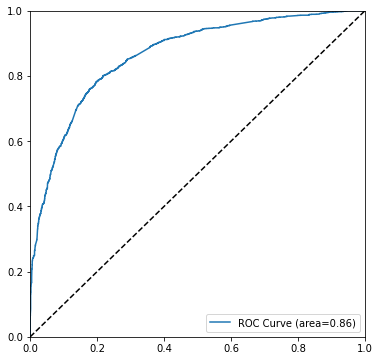

In [92]:
fpr,tpr,thresholds= metrics.roc_curve(y_train_prd_final.Converted,y_train_prd_final.Conversion_prob )
draw_roc(y_train_prd_final.Converted,y_train_prd_final.Conversion_prob)

Accuracy score of ROC curve for the model in train data set is 0.86, which represent the good model

In [93]:
num =[float(x)/10 for x in range(10) ]
num

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [94]:

for i in num :
    y_train_prd_final[i]= y_train_prd_final.Conversion_prob.map(lambda x: 1 if x>i else 0)

In [95]:
cutoff= pd.DataFrame(columns=["Prob","Accuracy","Sensitivity","Specificity"])

In [96]:
for i in num:
    cm1= metrics.confusion_matrix(y_train_prd_final.Converted, y_train_prd_final[i])
    total= sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total
    Sensitivity= cm1[1,1]/(cm1[1,1]+cm1[1,0])
    Specificity= cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff.loc[i]=[i,Accuracy,Sensitivity,Specificity]

In [97]:
cutoff

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.480834,1.000000,0.000000
0.1,0.1,0.577001,0.985548,0.198618
0.2,0.2,0.705896,0.940326,0.488774
0.3,0.3,0.755436,0.897902,0.623489
0.4,0.4,0.785922,0.813520,0.760363
0.5,0.5,0.790854,0.746387,0.832038
0.6,0.6,0.767541,0.643357,0.882556
0.7,0.7,0.752970,0.576224,0.916667
0.8,0.8,0.707465,0.442890,0.952504
0.9,0.9,0.642233,0.271329,0.985751


<Figure size 1080x576 with 0 Axes>

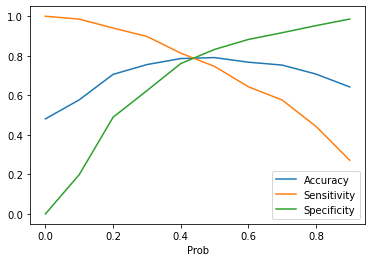

In [98]:
plt.figure(figsize=(15,8))
cutoff.plot.line(x="Prob", y=["Accuracy","Sensitivity","Specificity"])

# Testing the Model

In [99]:
#model testing with test data 

X_test[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']]=scaler.fit_transform(X_test[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']])
X_test_sm=X_test[col]
X_test_sm.drop(['What is your current occupation_Housewife',
               'Lead Source_Welingak Website'],axis=1,inplace=True)

#predicting test data

X_test_sm=sm.add_constant(X_test_sm)
y_test_prd=res.predict(X_test_sm)

y_test_prd_final=pd.DataFrame({"Converted": y_test.values, 
                               "Conversion_prob": y_test_prd})
y_test_prd_final["Predicted"]=y_test_prd_final.Conversion_prob.map(lambda x: 1 if x>0.5 else 0)

y_test_prd_final

<ipython-input-99-52cb87918fe8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['TotalVisits', 'Total Time Spent on Website',
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,Converted,Conversion_prob,Predicted
1077,1,0.207175,0
2079,1,0.214599,0
2325,0,0.547878,1
1132,1,0.985282,1
7181,0,0.929608,1
...,...,...,...
4000,0,0.846767,1
6543,0,0.161419,0
1436,1,0.567851,1
4778,0,0.741823,1


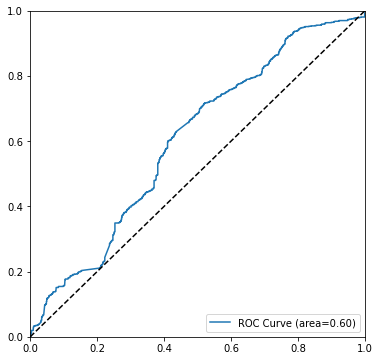

In [100]:
#ROC curve for test data
def draw_roc(actual,probs):
    fpr,tpr,thresholds= metrics.roc_curve(actual,probs,drop_intermediate=False)
    accuracy_score= metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(6,6))
    plt.plot(fpr,tpr,label= "ROC Curve (area=%0.2f)"  % accuracy_score)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim(0.0,1.0)
    plt.ylim(0.0,1.0)
    plt.legend(loc="lower right")
    plt.show()
    return None

fpr,tpr,thresholds= metrics.roc_curve(y_test_prd_final.Converted,y_test_prd_final.Conversion_prob )
draw_roc(y_test_prd_final.Converted,y_test_prd_final.Conversion_prob)

In [101]:

for i in num :
    y_test_prd_final[i]= y_test_prd_final.Conversion_prob.map(lambda x: 1 if x>i else 0)
    
cutoff_test= pd.DataFrame(columns=["Prob","Accuracy","Sensitivity","Specificity"])
for i in num:
    cm2= metrics.confusion_matrix(y_test_prd_final.Converted, y_test_prd_final[i])
    total= sum(sum(cm2))
    Accuracy = (cm2[0,0]+cm2[1,1])/total
    Sensitivity= cm2[1,1]/(cm2[1,1]+cm2[1,0])
    Specificity= cm2[0,0]/(cm2[0,0]+cm2[0,1])
    cutoff_test.loc[i]=[i,Accuracy,Sensitivity,Specificity]

<Figure size 1080x432 with 0 Axes>

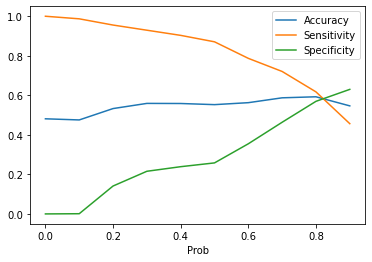

In [102]:
plt.figure(figsize=(15,6))
cutoff_test.plot.line(x="Prob", y=["Accuracy","Sensitivity","Specificity"])